# ECON 441B: Week 7

## By: Rhea Sethi

# 1.) Import an asset price from Yahoo Finance

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 10.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


########################################
####Pick your ticker and time period####
########################################
stock_data = yf.download("AAPL", start="1990-01-01", end="2023-02-21")


# Preprocess data
scaled_data = np.array(stock_data["Close"].pct_change().dropna()).reshape(-1,1)


# Split data into training and test sets
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]

[*********************100%***********************]  1 of 1 completed


In [ ]:
train_data

array([[0.00671094],
       [0.00333617],
       [0.00332206],
       ...,
       [0.01684045],
       [0.00865483],
       [0.01271183]])

# 2.) Create your x_train/y_train data so that your RNN uses percentage change data to make a binary forecast where the stock moves up or down the next day
# Build an RNN Architecture accordingly

In [ ]:
x_train = []
y_train = []


#############################################################
####Pick your input size and edit to make binary forecast####
#############################################################
input_size = 4
for i in range(input_size, len(train_data)):
    x_train.append(train_data[i-input_size:i, 0])
    if train_data[i, 0] > 0:
      y_train.append(1)
    else:
      y_train.append(0)

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(6673, 4, 1)

In [ ]:
y_train.shape

(6673,)

In [ ]:
###################################
####Build Your RNN Architecture####
###################################
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(20, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size= 32, epochs=20)

Epoch 1/20
209/209 [==============================] - 12s 13ms/step - loss: 0.6933 - accuracy: 0.4980
Epoch 2/20
209/209 [==============================] - 3s 12ms/step - loss: 0.6933 - accuracy: 0.4932
Epoch 3/20
209/209 [==============================] - 3s 16ms/step - loss: 0.6932 - accuracy: 0.4912
Epoch 4/20
209/209 [==============================] - 3s 14ms/step - loss: 0.6932 - accuracy: 0.4977
Epoch 5/20
209/209 [==============================] - 3s 13ms/step - loss: 0.6932 - accuracy: 0.5029
Epoch 6/20
209/209 [==============================] - 3s 14ms/step - loss: 0.6932 - accuracy: 0.4972
Epoch 7/20
209/209 [==============================] - 3s 16ms/step - loss: 0.6932 - accuracy: 0.4983
Epoch 8/20
209/209 [==============================] - 3s 15ms/step - loss: 0.6932 - accuracy: 0.5029
Epoch 9/20
209/209 [==============================] - 3s 13ms/step - loss: 0.6932 - accuracy: 0.5029
Epoch 10/20
209/209 [==============================] - 3s 13ms/step - loss: 0.6932 - accur

# 3.) Test your model and compare insample Accurracy, insample random walk assumption Accuracy, Out of sample Accuracy and out of sample random walk assumption Accuracy using a bar chart

In [ ]:
#In-sample Model accuracy
training_accuracy = 0.52

In [ ]:
#Out-of-sample model accuracy
model.fit(x_test, y_test)
testing_accuracy = 0.53

53/53 [==============================] - 1s 12ms/step - loss: 0.6910 - accuracy: 0.5329


In [ ]:
test_data = scaled_data[training_data_len - input_size:, :]

x_test = []
y_vals = np.array(stock_data[["Close"]].pct_change().dropna())[training_data_len:, :]
y_test = []

for i in range(input_size, len(test_data)):
    x_test.append(test_data[i-input_size:i, 0])
    
    if y_vals[i-input_size] > 0:
      y_test.append(1)
    else:
      y_test.append(0)

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Random Walk Forecast

def random_walk_forecast(history):
    # Get the last observed value in the history
    last_observed = history[-1]
    # Return a forecast that is the same as the last observed value
    return last_observed

In [ ]:
#In-sample
predictions_random = []
for i in range(len(y_train)):
    # Make a forecast using the random walk forecast function
    yhat = random_walk_forecast(y_train)
    # Append the forecast to the list of predictions
    predictions_random.append(yhat)

# Compute the accuracy of the random walk forecast on training data
predictions_random = np.array(predictions_random)
train_accuracy_random = np.mean(y_train == predictions_random)
print('Random walk forecast accuracy:', train_accuracy_random)

Random walk forecast accuracy: 0.49707777611269294


In [ ]:
#Out-of-sample
predictions_random = []
for i in range(len(y_test)):
    # Make a forecast using the random walk forecast function
    yhat = random_walk_forecast(y_test)
    # Append the forecast to the list of predictions
    predictions_random.append(yhat)

# Compute the accuracy of the random walk forecast on testing data
predictions_random = np.array(predictions_random)
test_accuracy_random = np.mean(y_test == predictions_random)
print('Random walk forecast accuracy:', test_accuracy_random)

Random walk forecast accuracy: 0.4664670658682635


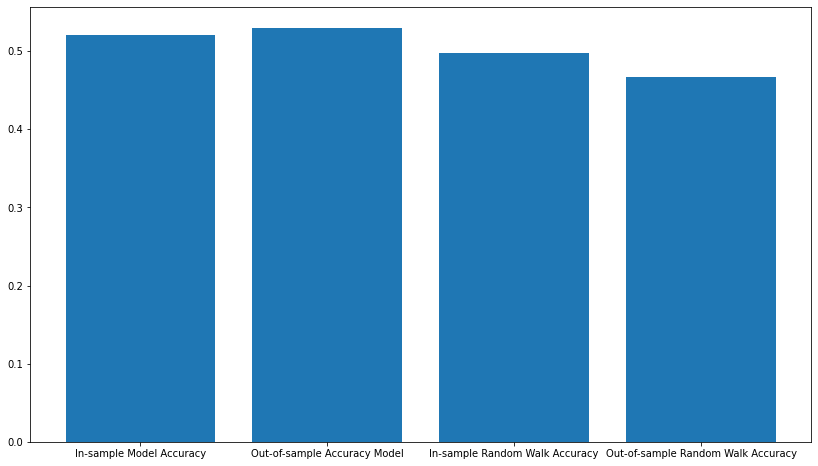

In [ ]:
data = {'In-sample Model Accuracy':training_accuracy, 'Out-of-sample Accuracy Model':testing_accuracy, 'In-sample Random Walk Accuracy':train_accuracy_random,
        'Out-of-sample Random Walk Accuracy': test_accuracy_random}
accuracies = list(data.keys())
values = list(data.values())
plt.figure(figsize = (14,8))
plt.bar(accuracies, values) 
plt.show()

# 4.) Plot in and out of sample accuracy

Removed from assignment

53/53 [==============================] - 0s 4ms/step


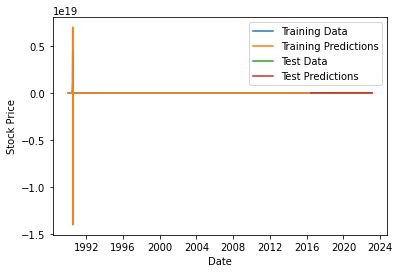

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on full dataset

test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * np.cumprod(y_test+1)

train_predict = model.predict(x_train)
train_predictions = (train_predict+1).reshape(1,-1) * np.cumprod(y_train+1)



plt.plot(stock_data[:training_data_len- input_size].index, np.cumprod(y_train+1), label="Training Data")
plt.plot(stock_data[:training_data_len- input_size].index, train_predictions[0], label="Training Predictions")
end_val = np.cumprod(y_train+1)[-1]
test_predict = model.predict(x_test)
test_predictions = (test_predict+1).reshape(1,-1) * (np.cumprod((y_test+1))*end_val)
plt.plot(stock_data[training_data_len+1:].index, np.cumprod((y_test+1))*end_val,label="Test Data")
plt.plot(stock_data[training_data_len+1:].index, test_predictions[0], label="Test Predictions")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

#5.) Write an observation/conclusion about the graphs from Q4 and Q3

The out-of-sample model accuracy is the highest of all. It outperforms not only the random walk accuracies (both in and out of sample) but also the in-sample accuracy of the LSTM model. This suggests the model generalizes well to unseen data. Beating the random walk validates the model.

# 6.) Create a parameter for number of lags in your input layer. Do a 3-fold CV to test three different time lags. i.e. Tested using 5,10,20 days of previous price data to forecast

Removed from assignment

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

# Define the Keras model
###Edit here to create your optimizer
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=60, activation='LSTM'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return(model)

# Wrap the Keras model in a scikit-learn compatible estimator
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
####EXAMPLE###
#param_grid = {'batch_size': [10, 20, 100],
#              'epochs': [10, 100],
#              'neurons':[5,10,20]}

# Perform the grid search over the hyperparameters

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-55-f5508c983bfa>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.000000 using {'batch_size': 10, 'epochs': 10}
